In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('Base_Final.xlsx')
df

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,...,ATTR2,ATTR3,CATEGORY_ID,CATEGORY_y,SEGMENT,YEAR,MONTH,WEEK_NUMBER,DATE,YEAR_MONTH
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058792778BP1,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058757630,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,PRETREAT,2023,7,26,2023-07-03,2023-07
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058753441,VANISH PODER O2 DOYPACK 120 GR 7501058753441,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7702626204208BP1,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07


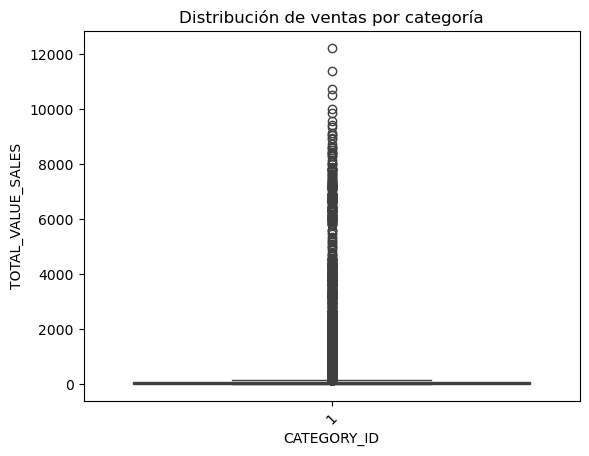

In [11]:
#Distribucion de ventas por categoría
sns.boxplot(x='CATEGORY_ID', y='TOTAL_VALUE_SALES', data=df)
plt.title("Distribución de ventas por categoría")
plt.xticks(rotation=45)
plt.show()


C:\Users\alfre\AppData\Local\Temp\ipykernel_4168\3337607253.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ventas_tiempo.index,rotation=90)


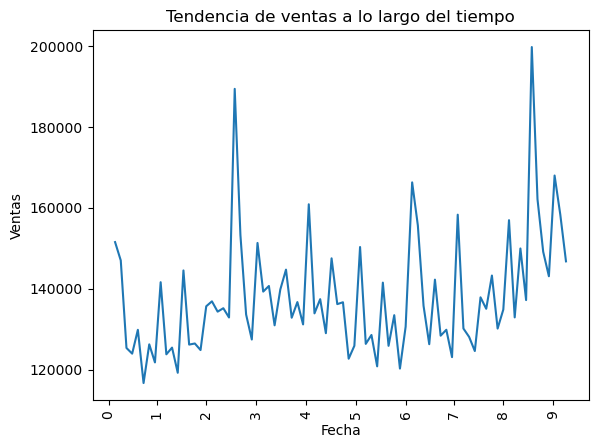

<Figure size 640x480 with 0 Axes>

In [39]:
#Tendencia de ventas en el tiempo
ventas_tiempo = df.groupby('DATE')['TOTAL_VALUE_SALES'].sum().reset_index()
fig, ax=plt.subplots()
sns.lineplot(data=ventas_tiempo, x='DATE', y='TOTAL_VALUE_SALES')
plt.title("Tendencia de ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
ax.set_xticklabels(ventas_tiempo.index,rotation=90)

plt.show()
plt.savefig("Dist_ventas_tiempo.png")

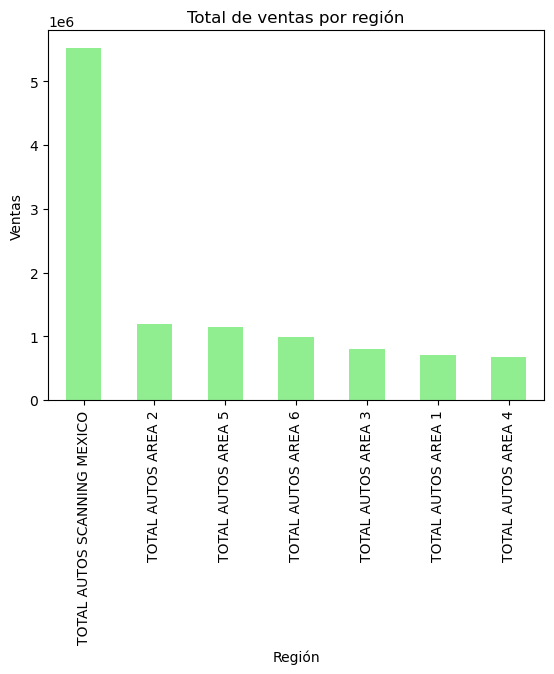

In [15]:
#Ventas por region
ventas_region = df.groupby('REGION')['TOTAL_VALUE_SALES'].sum().sort_values(ascending=False)

ventas_region.plot(kind='bar', color='lightgreen')
plt.title("Total de ventas por región")
plt.ylabel("Ventas")
plt.xlabel("Región")
plt.savefig("ventas_categoria.png")
plt.show()


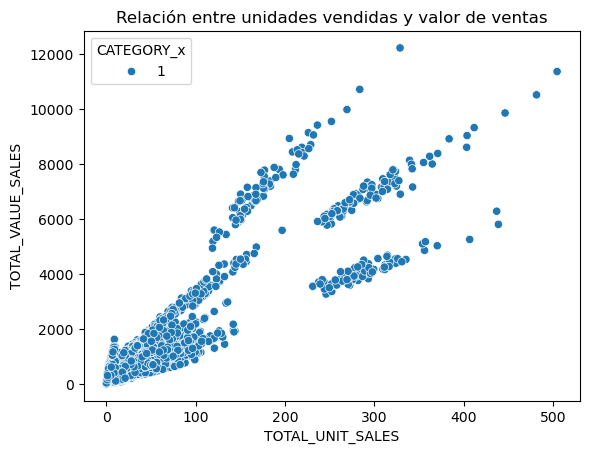

In [21]:
#Relacion entre unidades vendidas y valor de ventas
sns.scatterplot(data=df, x='TOTAL_UNIT_SALES', y='TOTAL_VALUE_SALES', hue='CATEGORY_x')
plt.title("Relación entre unidades vendidas y valor de ventas")
plt.show()

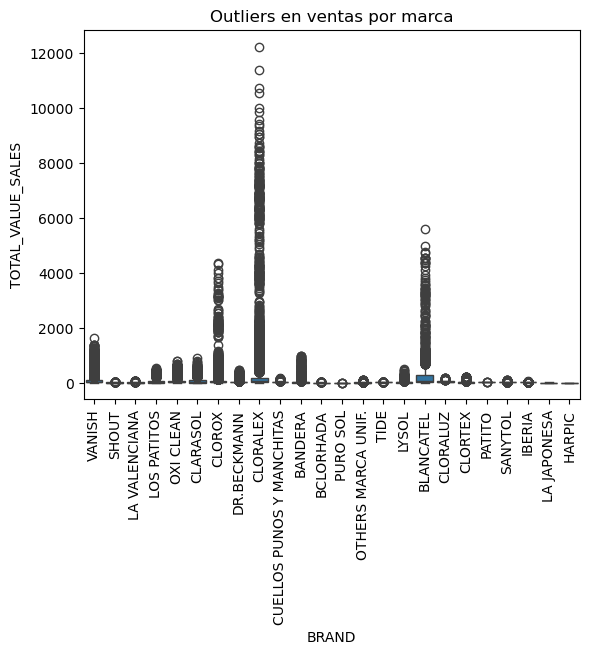

In [23]:
#Outliers por marca
sns.boxplot(x='BRAND', y='TOTAL_VALUE_SALES', data=df)
plt.title("Outliers en ventas por marca")
plt.xticks(rotation=90)
plt.show()

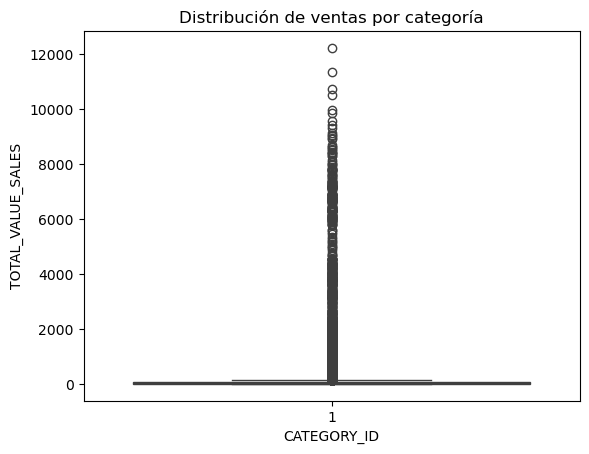

In [33]:
#Guardar ventas por categoría
plt.figure()
sns.boxplot(x='CATEGORY_ID', y='TOTAL_VALUE_SALES', data=df)
plt.title("Distribución de ventas por categoría")
plt.savefig("ventas_categoria.png")